In [2]:
import pandas as pd

# Sample dataset with duplicates
data = {
    'CustomerID': [101, 102, 103, 101, 104, 105, 103],
    'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'David', 'Eva', 'Charlie'],
    'Email': ['alice@example.com', 'bob@example.com', 'charlie@example.com', 'alice@example.com', 'david@example.com', 'eva@example.com', 'charlie@example.com'],
    'PurchaseAmount': [250, 150, 200, 250, 300, 450, 200]
}

df = pd.DataFrame(data)

print("Original dataset shape:", df.shape)
print("Original dataset:")
print(df)

# Task 1: Identify duplicate entries
duplicates = df.duplicated()
print("\nDuplicate rows identified (True means duplicate):")
print(duplicates)

# Task 2: Remove duplicate entries
df_cleaned = df.drop_duplicates()

print("\nDataset shape after removing duplicates:", df_cleaned.shape)
print("Dataset after removing duplicates:")
print(df_cleaned)

# Optional: Count duplicates
num_duplicates = duplicates.sum()
print(f"\nNumber of duplicate rows removed: {num_duplicates}")

# Task 3: Explanation for classmate
explanation = """
Duplicate data means the same record appears multiple times.
This can skew the analysis by giving more weight to repeated records,
leading models to overfit or bias predictions toward duplicated instances.
Removing duplicates ensures the model learns from unique data points,
improving prediction accuracy and generalization.
"""
print(explanation)

Original dataset shape: (7, 4)
Original dataset:
   CustomerID     Name                Email  PurchaseAmount
0         101    Alice    alice@example.com             250
1         102      Bob      bob@example.com             150
2         103  Charlie  charlie@example.com             200
3         101    Alice    alice@example.com             250
4         104    David    david@example.com             300
5         105      Eva      eva@example.com             450
6         103  Charlie  charlie@example.com             200

Duplicate rows identified (True means duplicate):
0    False
1    False
2    False
3     True
4    False
5    False
6     True
dtype: bool

Dataset shape after removing duplicates: (5, 4)
Dataset after removing duplicates:
   CustomerID     Name                Email  PurchaseAmount
0         101    Alice    alice@example.com             250
1         102      Bob      bob@example.com             150
2         103  Charlie  charlie@example.com             200
4      

In [3]:
import pandas as pd

# Sample data with inconsistent types
data = {
    'ID': ['1', '2', '3', '4'],
    'Age': ['25', '30', '35', 'forty'],  # 'forty' is a non-numeric string
    'Salary': ['50000', '60000', None, '70000'],
}

df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)
print("\nData types before conversion:")
print(df.dtypes)

# Task 1: Convert 'ID' column to integers
df['ID'] = pd.to_numeric(df['ID'], errors='coerce')

# Task 2: Identify columns with inconsistent data types and convert where possible
# Convert 'Age' and 'Salary' to numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

print("\nDataFrame after type conversion:")
print(df)
print("\nData types after conversion:")
print(df.dtypes)

# Task 3: Discussion (as a comment)
# Correct data types are critical for feature engineering because:
# - Numerical operations require numeric types.
# - ML algorithms need consistent input types.
# - Incorrect types can cause errors or misleading analysis.

Original DataFrame:
  ID    Age Salary
0  1     25  50000
1  2     30  60000
2  3     35   None
3  4  forty  70000

Data types before conversion:
ID        object
Age       object
Salary    object
dtype: object

DataFrame after type conversion:
   ID   Age   Salary
0   1  25.0  50000.0
1   2  30.0  60000.0
2   3  35.0      NaN
3   4   NaN  70000.0

Data types after conversion:
ID          int64
Age       float64
Salary    float64
dtype: object


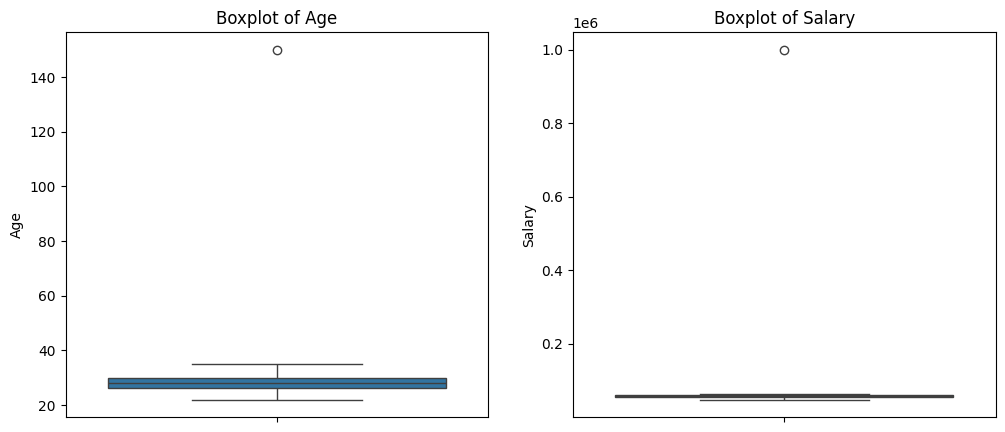

Outliers detected:
Empty DataFrame
Columns: [Age, Salary, Age_outlier, Salary_outlier]
Index: []

After removing outliers:
   Age   Salary  Age_zscore  Salary_zscore  Age_outlier  Salary_outlier
0   25    50000   -0.407524      -0.356849        False           False
1   30    60000   -0.271683      -0.321517        False           False
2   28    55000   -0.326020      -0.339183        False           False
3   22    48000   -0.489029      -0.363915        False           False
4   35    62000   -0.135841      -0.314451        False           False
5  150  1000000    2.988513       2.999648        False           False
6   29    58000   -0.298851      -0.328583        False           False
7   27    59000   -0.353188      -0.325050        False           False
8   26    61000   -0.380356      -0.317984        False           False
9   28    57000   -0.326020      -0.332116        False           False


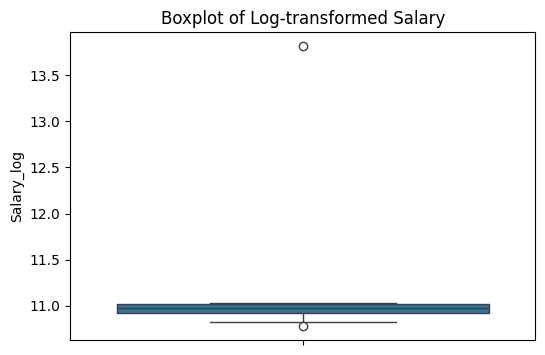


After Winsorizing (capping):
   Age  Age_capped   Salary  Salary_capped
0   25       25.00    50000          50000
1   30       30.00    60000          60000
2   28       28.00    55000          55000
3   22       23.35    48000          48900
4   35       35.00    62000          62000
5  150       98.25  1000000         577900
6   29       29.00    58000          58000
7   27       27.00    59000          59000
8   26       26.00    61000          61000
9   28       28.00    57000          57000

After imputing outliers with median:
   Age  Age_imputed   Salary  Salary_imputed
0   25           25    50000           50000
1   30           30    60000           60000
2   28           28    55000           55000
3   22           22    48000           48000
4   35           35    62000           62000
5  150          150  1000000         1000000
6   29           29    58000           58000
7   27           27    59000           59000
8   26           26    61000           61000
9   28   

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset with outliers
data = {
    'Age': [25, 30, 28, 22, 35, 150, 29, 27, 26, 28],  # 150 is an outlier
    'Salary': [50000, 60000, 55000, 48000, 62000, 1000000, 58000, 59000, 61000, 57000]  # 1,000,000 is an outlier
}

df = pd.DataFrame(data)

# Task 1: Visualize outliers using boxplots
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Salary'])
plt.title('Boxplot of Salary')

plt.show()

# Task 2: Detect outliers using Z-score method
from scipy.stats import zscore

df['Age_zscore'] = zscore(df['Age'])
df['Salary_zscore'] = zscore(df['Salary'])

# Define outlier threshold
threshold = 3

# Flag outliers
df['Age_outlier'] = df['Age_zscore'].abs() > threshold
df['Salary_outlier'] = df['Salary_zscore'].abs() > threshold

print("Outliers detected:")
print(df.loc[df['Age_outlier'] | df['Salary_outlier'], ['Age', 'Salary', 'Age_outlier', 'Salary_outlier']])

# Task 3: Handling Outliers

# Method 1: Removal
df_removed = df.loc[~(df['Age_outlier'] | df['Salary_outlier'])].copy()
print("\nAfter removing outliers:")
print(df_removed)

# Method 2: Transformation (log transform on Salary)
df['Salary_log'] = np.log(df['Salary'])

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Salary_log'])
plt.title('Boxplot of Log-transformed Salary')
plt.show()

# Method 3: Capping (Winsorizing) - cap to 5th and 95th percentile
def winsorize(series, lower_quantile=0.05, upper_quantile=0.95):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return series.clip(lower=lower, upper=upper)

df['Age_capped'] = winsorize(df['Age'])
df['Salary_capped'] = winsorize(df['Salary'])

print("\nAfter Winsorizing (capping):")
print(df[['Age', 'Age_capped', 'Salary', 'Salary_capped']])

# Method 4: Imputation - Replace outliers with median
age_median = df['Age'].median()
salary_median = df['Salary'].median()

df['Age_imputed'] = df['Age'].where(~df['Age_outlier'], age_median)
df['Salary_imputed'] = df['Salary'].where(~df['Salary_outlier'], salary_median)

print("\nAfter imputing outliers with median:")
print(df[['Age', 'Age_imputed', 'Salary', 'Salary_imputed']])